In [1]:
import numpy as np, prjlib, analysis as ana, binning as bins, plottools as pl
from matplotlib.pyplot import *

In [2]:
#PSA = 's14&15_boss'
PSA = 's14&15_deep56'
rlmin = '200'
ver = 'v1'
ps, fs = prjlib.filename_init(PSA=PSA,rlmin=rlmin,stype='lcmb',doreal='True',ver=ver)
pr, fr = prjlib.filename_init(PSA=PSA,rlmin=rlmin,stype='lcmb',doreal='True',dearot='True',ver=ver)
pa, fa = prjlib.filename_init(PSA=PSA,rlmin=rlmin,stype='absrot')

In [3]:
snmax = 100
Lmin, Lmax = 10, 2048
L = np.linspace(0,Lmax,Lmax+1)
scl = np.array([np.loadtxt(ps.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,snmax+1)])
ocl = np.loadtxt(ps.quad.f['EB'].cl[0],unpack=True)[1]
rcl = np.loadtxt(pr.quad.f['EB'].cl[0],unpack=True)[1]
Rcl = np.loadtxt(pr.quad.f['EB'].cl[0].replace('dearot','dearot_old'),unpack=True)[1]
acl = np.array([np.loadtxt(pa.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,snmax+1)])
dcl = np.mean(acl-scl,axis=0)
fcl = 1e-4*2*np.pi/(L**2+L+1e-30)
n0 = np.loadtxt(ps.quad.f['EB'].n0bs,unpack=True)[1]
l, cs, vs = np.loadtxt(ps.quad.f['EB'].mcls,usecols=(0,1,5),unpack=True)
print(pr.quad.f['EB'].cl[0])

/global/homes/t/toshiyan/Work/Ongoing/ACT/data/curvedsky/rot/aps/rlz/cl_EB_lcmb_s14+15_deep56_ns2048_lc100_a1deg_l200-2048_real_dearot_v1.dat


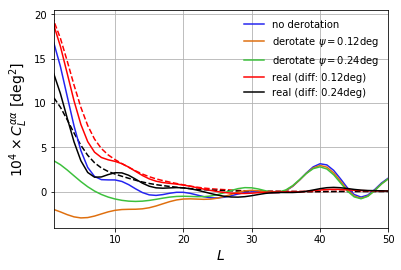

In [4]:
s = 1e4*(180./np.pi)**2
na = np.loadtxt(pr.quad.f['EB'].rdn0[0],unpack=True)[1]
n0 = np.loadtxt(pr.quad.f['EB'].n0bs,unpack=True)[1]
n1 = np.loadtxt(pr.quad.f['EB'].rdn0[0].replace('dearot','dearot_old'),unpack=True)[1]
pl.plot_1dstyle(xlab='$L$',ylab=r'$10^4\times C_L^{\alpha\alpha}$ [deg$^2$]',xmin=1,xmax=50,grid=True)
ai = .14
plot(l,s*dcl*((ai/.08)**2-((.12-ai)/0.08)**2),color='r',ls='--')
plot(l,s*dcl*((ai/.08)**2-((.235-ai)/0.08)**2),color='k',ls='--')
plot(l,s*ocl,label=r'no derotation')
plot(l,s*rcl,label=r'derotate $\psi=0.12$deg')
plot(l,s*Rcl,label=r'derotate $\psi=0.24$deg')
plot(l,s*(ocl-rcl),label=r'real (diff: 0.12deg)',color='r')
plot(l,s*(ocl-Rcl),label=r'real (diff: 0.24deg)',color='k')
legend(loc=0,frameon=False)
#savefig('fig_absrot.png')

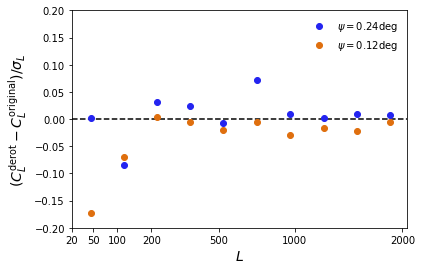

In [5]:
mb = bins.multipole_binning(10,spc='p2',lmin=20,lmax=2048)
sc0 = prjlib.binned_cl_rlz(ps.quad.f['EB'].cl,1,100,mb)
oc0 = prjlib.binned_cl(ps.quad.f['EB'].cl[0],mb)
oc1 = prjlib.binned_cl(pr.quad.f['EB'].cl[0],mb)
oc2 = prjlib.binned_cl(pr.quad.f['EB'].cl[0].replace('dearot','dearot_old'),mb)
pl.plot_1dstyle(spc='p2',xlab='$L$',ylab=r'$(C_L^{\rm derot}-C_L^{\rm original})/\sigma_L$',xmin=20,xmax=2048,ymin=-.2,ymax=.2)
errorbar(np.sqrt(mb.bc),(oc2-oc0)/np.std(sc0),fmt='o',label=r'$\psi=0.24$deg')
errorbar(np.sqrt(mb.bc),(oc1-oc0)/np.std(sc0),fmt='o',label=r'$\psi=0.12$deg')
legend(loc=0,frameon=False)
axhline(0,color='k',ls='--')